# TASK 3- Sales Prediction using Python

 ## problem statement :
 ##### The goal of this task is to develop a model that accurately predict future sales using machine learning techniques, helping businesses optimize advertising strategies and maximize sales potential.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Load Dataset :

In [5]:
df = pd.read_csv(r'C:\Users\umang\Downloads\advertisement_data\advertising.csv')

In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Data cleaning

In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [12]:
df.duplicated().sum()

0

<Axes: >

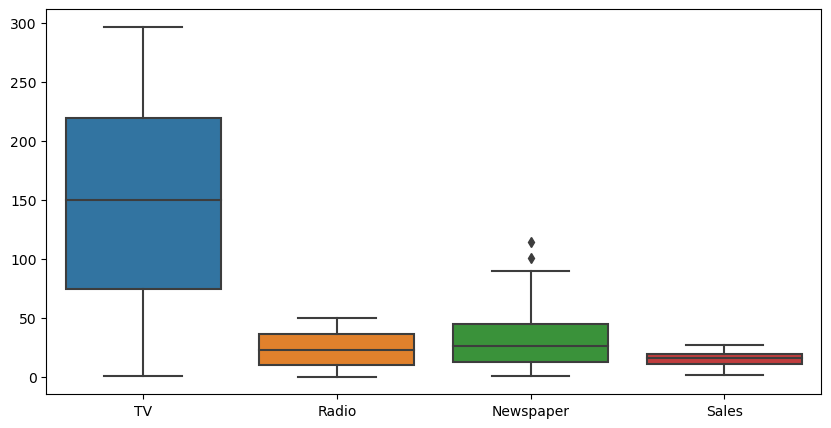

In [14]:
# Outlier Detection
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=df, ax=ax)

### * No considerable outliers in the data.


##  Exploratory Data Analysis (EDA)
##### Descriptive Data Analysis





In [15]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Univariate Analysis

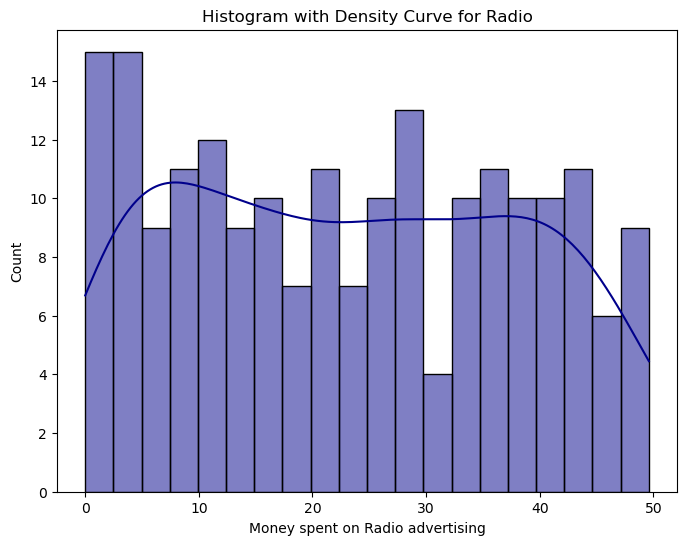

In [25]:
#Histogram with Density curve for Radio Advertising

fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Radio'],bins=20,color='darkblue', kde=True)
ax.set_xlabel('Money spent on Radio advertising')
ax.set_title('Histogram with Density Curve for Radio')
plt.show()

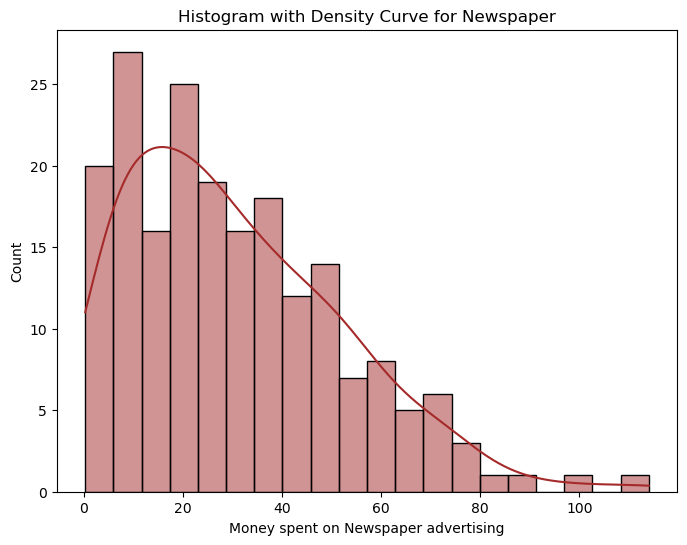

In [21]:
#Histogram with Density curve for Newspaper Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Newspaper'],bins=20,color='brown', kde=True)
ax.set_xlabel('Money spent on Newspaper advertising')
ax.set_title('Histogram with Density Curve for Newspaper')
plt.show()

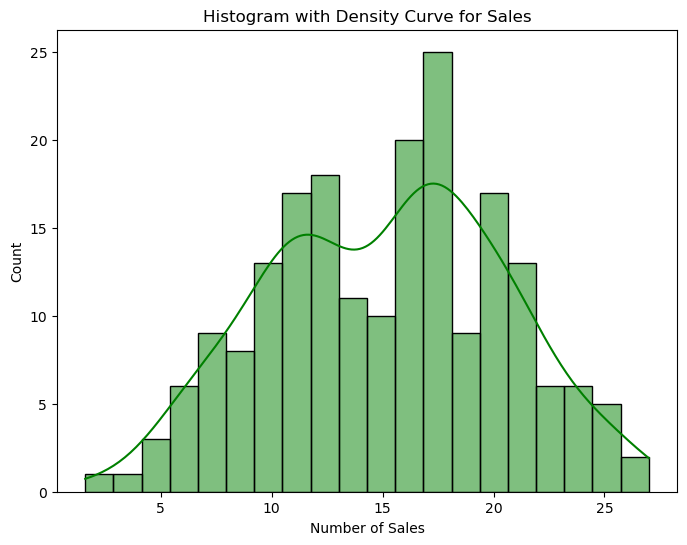

In [22]:
#Histogram with Density curve for Sales Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Sales'],bins=20,color='green', kde=True)
ax.set_xlabel('Number of Sales')
ax.set_title('Histogram with Density Curve for Sales')
plt.show()

##  Correlation Analysis

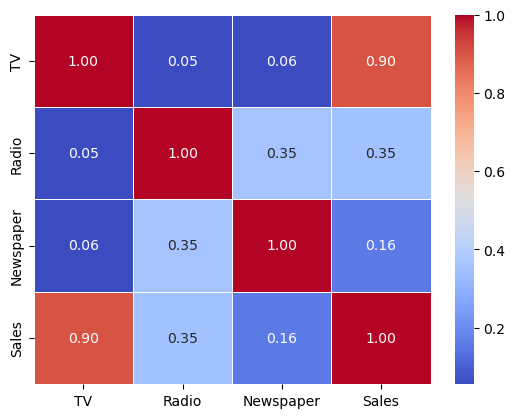

In [26]:
# Checking relationship between variables
fig,ax=plt.subplots()
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

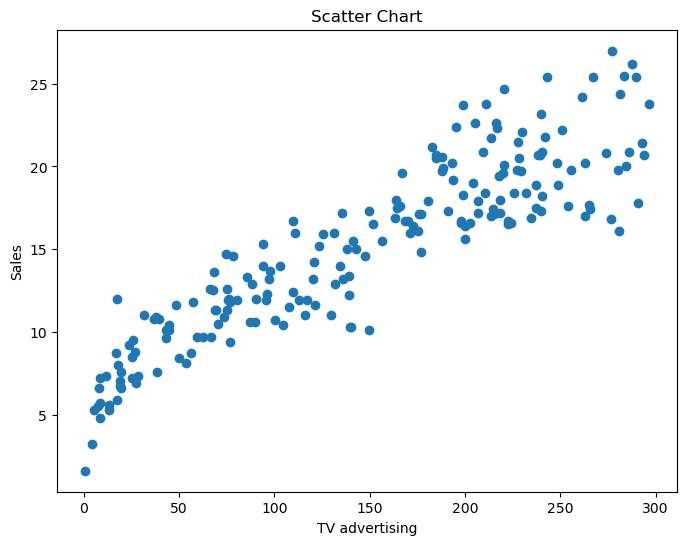

In [28]:
#Relationship of Sales against TV Advertising
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(x='TV',y='Sales',data=df,marker='o')
ax.set_xlabel('TV advertising')
ax.set_ylabel('Sales')
ax.set_title("Scatter Chart")
plt.show()


## Data Splitting




In [30]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= df[['TV', 'Radio','Newspaper']]
y=df['Sales']

#Split dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

train_data= x_train.join(y_train)
train_data


,TV,Radio,Newspaper,Sales
42,293.6,27.7,1.8,20.7
75,16.9,43.7,89.4,8.7
3,151.5,41.3,58.5,16.5
14,204.1,32.9,46.0,19.0
140,73.4,17.0,12.9,10.9
...,...,...,...,...
51,100.4,9.6,3.6,10.7
105,137.9,46.4,59.0,15.0
77,120.5,28.5,14.2,14.2
15,195.4,47.7,52.9,22.4



## Model Selection - Linear Regression Model
#### Model Building




In [31]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data[['TV', 'Radio','Newspaper']], train_data['Sales']

#Build a Linear Regression model
fitted_model = LinearRegression()
#Train the model
fitted_model.fit(x_train,y_train)
#Make predictions
y_pred = fitted_model.predict(x_test)



## Model Evaluation




In [32]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE =  mean_squared_error(y_test, y_pred) 
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)


Mean squared error value is:  3.5973059648170986
Mean absolute error value is:  1.3764224290768918
R2 score value is:  0.8811505081274154


#### * The coefficient of the determination or the R2 score value of fitted linear regression model is 0.9 which means about 90% of the variance in the target variable(Sales) is strongly explained by the model. Also, the mean squared error value or the difference between actual and predicted value is 2.46 and the mean absolute error values is 1.22 which are not considerably high. So, we can accept this fitted model for predict future sales based on the money spent on different platforms for marketing.

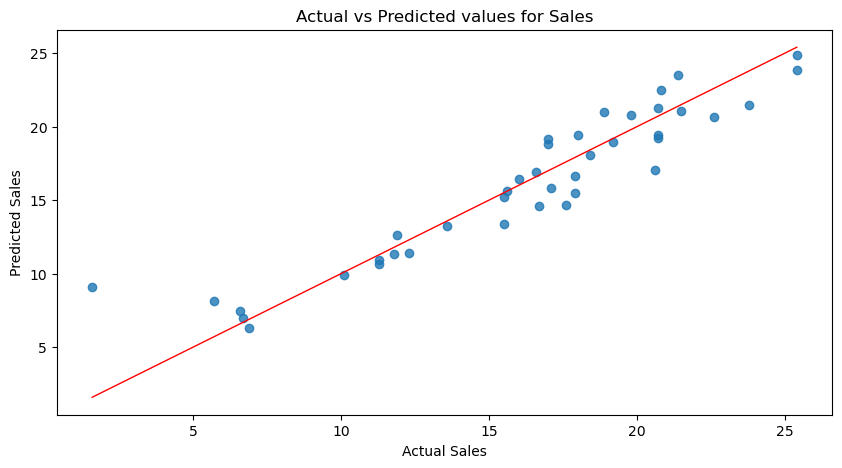

In [33]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred,alpha=0.8)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=1)
plt.title('Actual vs Predicted values for Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

### Model Testing

In [34]:
x.tail(10)

,TV,Radio,Newspaper
190,39.5,41.1,5.8
191,75.5,10.8,6.0
192,17.2,4.1,31.6
193,166.8,42.0,3.6
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [35]:
x.tail(10)

,TV,Radio,Newspaper
190,39.5,41.1,5.8
191,75.5,10.8,6.0
192,17.2,4.1,31.6
193,166.8,42.0,3.6
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [36]:
## Create new trial dataframe to testing

data = {'TV': [100], 'Radio': [20] ,'Newspaper': [10]}
trial_data = pd.DataFrame(data)

# Predict rating using trial data
predict_rating = fitted_model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])



Predicted Rating for trial data:  12.240070854147541


### Observation : 

##### The linear regression model for predicting sales based on advertising spends performs well. It explains 90% of the sales variation (R² = 0.9), showing it captures the relationship effectively.

#### The errors are low, with an MSE of 2.46 and an MAE of 1.22, meaning the model's predictions are close to the actual sales numbers.

###### TV advertising has the strongest influence on sales, with a correlation of 0.9. This suggests that spending on TV ads drives sales more than radio or newspaper ads, emphasizing the importance of investing in TV marketing for better returns.